IMPORTING NESSECARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

LOADING THE DATASET "gender_classification.csv"

In [2]:
gender_data = pd.read_csv("./gender_classfication_data/gender_classification.csv")

DISPLAYING THE DATA IN DATASET

In [3]:
gender_data

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


EXPLORING THE DATASET

In [4]:
gender_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [5]:
gender_data.shape

(5001, 8)

In [6]:
gender_data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [7]:
gender_data.tail()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female
5000,1,15.4,5.4,1,1,1,1,Male


In [8]:
gender_data.dtypes

long_hair                      int64
forehead_width_cm            float64
forehead_height_cm           float64
nose_wide                      int64
nose_long                      int64
lips_thin                      int64
distance_nose_to_lip_long      int64
gender                        object
dtype: object

EXPLORATORY DATA ANALYSIS (EDA)

In [9]:
print (f"Dataset Columns:\n{gender_data.columns}")

Dataset Columns:
Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')


In [10]:
gender_data.describe().T

,count,mean,std,min,25%,50%,75%,max
long_hair,5001.0,0.869626,0.336748,0.0,1.0,1.0,1.0,1.0
forehead_width_cm,5001.0,13.181484,1.107128,11.4,12.2,13.1,14.0,15.5
forehead_height_cm,5001.0,5.946311,0.541268,5.1,5.5,5.9,6.4,7.1
nose_wide,5001.0,0.493901,0.500013,0.0,0.0,0.0,1.0,1.0
nose_long,5001.0,0.507898,0.499988,0.0,0.0,1.0,1.0,1.0
lips_thin,5001.0,0.493101,0.500002,0.0,0.0,0.0,1.0,1.0
distance_nose_to_lip_long,5001.0,0.498900,0.500049,0.0,0.0,0.0,1.0,1.0


CHECK FOR MISSING VALUES

In [11]:
gender_data.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [12]:
gender_data.isnull().sum().sum()

0

There are no missing values.

CHECKING FOR DUPLICATE VALUES

In [13]:
duplicate_rows = gender_data[gender_data.duplicated()]
print(f"Number of duplicate rows: {len(duplicate_rows)}")
print(duplicate_rows)

Number of duplicate rows: 1768
      long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  \
59            1               14.1                 5.9          0          0   
66            1               14.2                 6.2          0          0   
175           1               12.7                 5.7          1          1   
230           1               12.9                 5.1          0          0   
261           1               13.0                 6.2          1          1   
...         ...                ...                 ...        ...        ...   
4996          1               13.6                 5.1          0          0   
4997          1               11.9                 5.4          0          0   
4998          1               12.9                 5.7          0          0   
4999          1               13.2                 6.2          0          0   
5000          1               15.4                 5.4          1          1   

      li

In [14]:
gender_data.drop_duplicates(inplace=True)
print(gender_data.shape)

(3233, 8)


In [15]:
gender_data.duplicated().sum()

0

No more duplicate values in the dataset

NOW DIVIDING DATA SET INTO OBJECT COLUMNS AND NUMERICAL COLUMNS

In [16]:
object_cols = [col for col in gender_data.columns if gender_data[col].dtype==object]
print("OBJECT COLUMNS ARE\n" , object_cols)

num_cols = list(set(gender_data.columns) - set(object_cols))
print("\nNUMERICAL COLUMNS ARE\n" , num_cols)   

OBJECT COLUMNS ARE
 ['gender']

NUMERICAL COLUMNS ARE
 ['nose_wide', 'forehead_width_cm', 'forehead_height_cm', 'lips_thin', 'long_hair', 'distance_nose_to_lip_long', 'nose_long']


NOW CONVERTING CATEGORICAL DATA INTO NUMERIC VAlUE FOR FURTHER EDA AND CALCULATIONS

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
gender_data['gender_numeric'] = encoder.fit_transform(gender_data['gender'])
gender_data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender,gender_numeric
0,1,11.8,6.1,1,0,1,1,Male,1
1,0,14.0,5.4,0,0,1,0,Female,0
2,0,11.8,6.3,1,1,1,1,Male,1
3,0,14.4,6.1,0,1,1,1,Male,1
4,1,13.5,5.9,0,0,0,0,Female,0


In [19]:
gender_data['gender_numeric'].unique()

array([1, 0])

In [20]:
project_data = gender_data.drop(["gender"], axis= 1)
project_data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender_numeric
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0


<Axes: ylabel='count'>

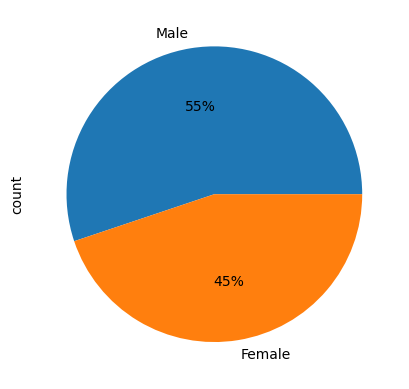

In [21]:
project_data['gender_numeric'].value_counts().plot(kind="pie",autopct='%1.0f%%' ,labels=['Male','Female'])

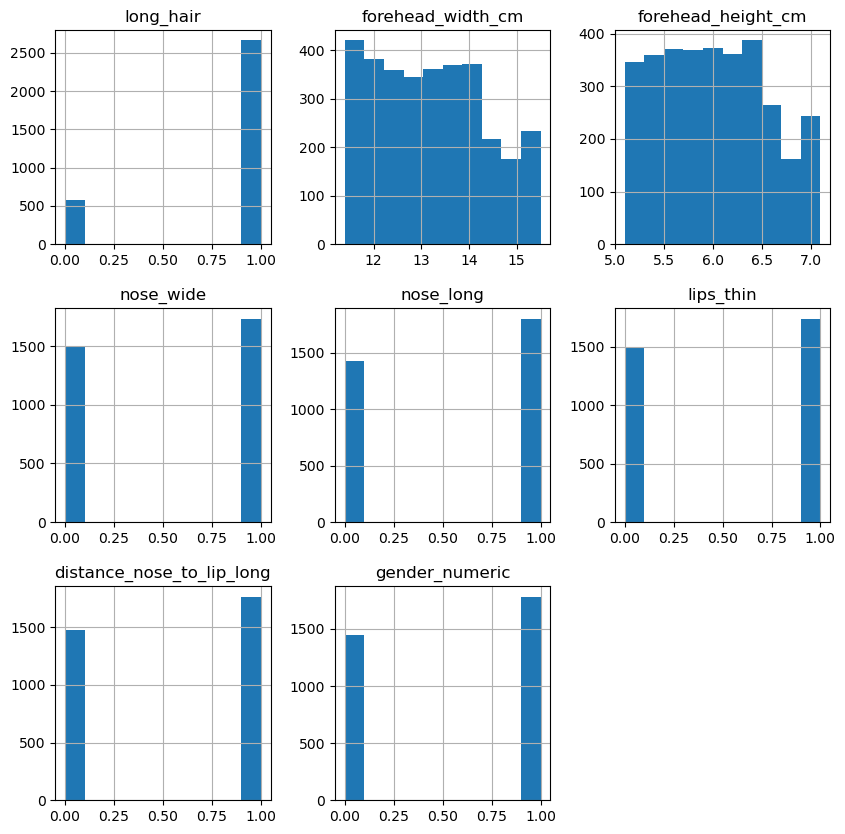

In [56]:
data_hist_plot=project_data.hist(figsize=(10,10))

CORRELATION & CORRELATION MATRIX

In [23]:
corr_matrix=project_data.corr()
corr_matrix

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender_numeric
long_hair,1.000000,-0.013151,-0.005145,0.024123,0.042556,0.037514,-0.011362,0.013933
forehead_width_cm,-0.013151,1.000000,0.079665,0.212223,0.212032,0.220566,0.206636,0.323520
forehead_height_cm,-0.005145,0.079665,1.000000,0.180526,0.153438,0.170018,0.183036,0.266843
nose_wide,0.024123,0.212223,0.180526,1.000000,0.394605,0.379767,0.395401,0.661864
nose_long,0.042556,0.212032,0.153438,0.394605,1.000000,0.384860,0.377462,0.638187
lips_thin,0.037514,0.220566,0.170018,0.379767,0.384860,1.000000,0.380805,0.631065
distance_nose_to_lip_long,-0.011362,0.206636,0.183036,0.395401,0.377462,0.380805,1.000000,0.646612
gender_numeric,0.013933,0.323520,0.266843,0.661864,0.638187,0.631065,0.646612,1.000000


HEATMAP

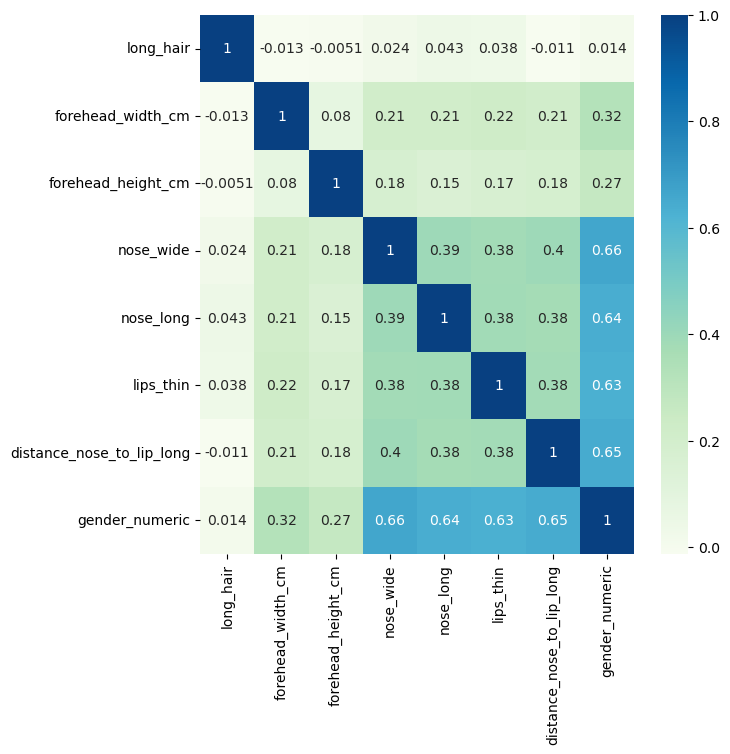

In [24]:
plt.figure(figsize=(7,7))
p=sns.heatmap(corr_matrix,annot=True,cmap="GnBu")

PREPROCESSING DATA

SCALING

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
columns=['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long']
scale_X=StandardScaler()
X =  pd.DataFrame(scale_X.fit_transform(project_data.drop(["gender_numeric"],axis = 1),), columns = columns)

In [57]:
X.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,11.8,6.1,1,0,1,1
1,0,14.0,5.4,0,0,1,0
2,0,11.8,6.3,1,1,1,1
3,0,14.4,6.1,0,1,1,1
4,1,13.5,5.9,0,0,0,0


In [30]:
y = project_data["gender_numeric"]
y.head()

0    1
1    0
2    1
3    1
4    0
Name: gender_numeric, dtype: int64

TRAIN TEST SPLIT AND CROSS VALIDATION METHODS

Splitting the dependent and independent features.

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [33]:
X = project_data.drop('gender_numeric', axis = 1)
y = project_data['gender_numeric']

Splitting data into training and test set

In [34]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=50)

Check the shape of the splited sets

In [35]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2263, 7), (970, 7), (2263,), (970,))

MODEL TRAINING AND TESTING FOR ACCURACY

EVALUATION OF THE MODEL

In [36]:
def model_evaluation(model, X_train, y_train, X_test, y_test):
    # Scaling Process
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

1. LOGISTIC REGRESSION

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [39]:
ypred_lr=log_reg.predict(X_test)

In [40]:
log_reg_accuracy=accuracy_score(y_test,ypred_lr)
print(f"Accuracy of Logistic Regression:{log_reg_accuracy}")

Accuracy of Logistic Regression:0.9577319587628866


In [41]:
print("Logistic Regression Classification Report")
print(classification_report(y_test,ypred_lr))

Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       426
           1       0.96      0.97      0.96       544

    accuracy                           0.96       970
   macro avg       0.96      0.96      0.96       970
weighted avg       0.96      0.96      0.96       970



2. DECISION TREE CLASSIFICATION

In [42]:

from sklearn.tree import DecisionTreeClassifier

In [43]:
dt_class = DecisionTreeClassifier()
dt_class.fit(X_train,y_train)

DecisionTreeClassifier()

In [44]:
ypred_dtc=dt_class.predict(X_test)

In [45]:
dtc_accuracy=accuracy_score(y_test,ypred_dtc)
print(f"Accuracy of Decision Tree Classification:{dtc_accuracy}")

Accuracy of Decision Tree Classification:0.9474226804123711


In [46]:
print("Decision Tree Classification Report")
print(classification_report(y_test, ypred_dtc))


Decision Tree Classification Report
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       426
           1       0.95      0.96      0.95       544

    accuracy                           0.95       970
   macro avg       0.95      0.95      0.95       970
weighted avg       0.95      0.95      0.95       970



3. K-NEAREST NEIGHBORS (KNN)

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
knn_class = KNeighborsClassifier()
knn_class.fit(X_train, y_train)

KNeighborsClassifier()

In [49]:
ypred_knn= knn_class.predict(X_test)

In [50]:
knn_accuracy = accuracy_score(y_test, ypred_knn)
print(f"Accuracy of K_Neighbors Classification:{knn_accuracy}")

Accuracy of K_Neighbors Classification:0.9525773195876288


In [51]:
print("K_NeighborsvClassifier Report")
print(classification_report(y_test, ypred_knn))

K_NeighborsvClassifier Report
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       426
           1       0.96      0.95      0.96       544

    accuracy                           0.95       970
   macro avg       0.95      0.95      0.95       970
weighted avg       0.95      0.95      0.95       970



MODEL COMPARISION

In [52]:
log_reg_accuracy

0.9577319587628866

In [53]:
dtc_accuracy

0.9474226804123711

In [54]:
knn_accuracy

0.9525773195876288

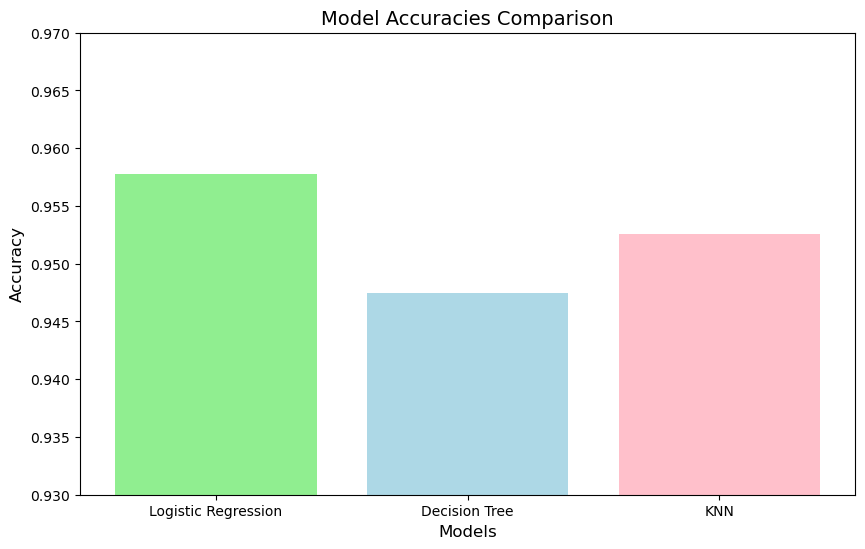

In [55]:
models = ['Logistic Regression', 'Decision Tree', 'KNN', ]
accuracies = [log_reg_accuracy,dtc_accuracy,knn_accuracy]


plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['lightgreen', 'lightblue', 'pink'])

plt.title('Model Accuracies Comparison', fontsize=14)
plt.ylim(0.93,0.97)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

plt.show()

This bar graph shows that the Logistic Regression model is comparatively more accurate than other models.